# Bank Marketing Campaign Predictive Analytics Project

#  Problem Statement

There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

#  Data Pre-Processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv("bank-additional-full.csv",sep=';')

In [3]:
bank.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
bank.shape

(41188, 21)

In [86]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [87]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [88]:
bank.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [5]:
bank.duplicated().sum()

12

In [6]:
bank.drop_duplicates(keep=False, inplace=True)

In [91]:
bank.shape

(41164, 21)

#  Exploratory Data Analysis

# Pandas-Profiling

In [92]:
!pip install pandas-profiling
from pandas_profiling import ProfileReport
prof = ProfileReport (bank, title="Pandas-Profiling.html", html={'style': {'fullwidth' : True}})
prof

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=58075d752f006b49675217440e23692940cc17ebaf1ee8598e70a93ac0d2b7ad
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.0
    Uninstalling pydantic-2.

<ipython-input-92-1364477865d4>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#  Feature Engineering

#  Removal of Outlier

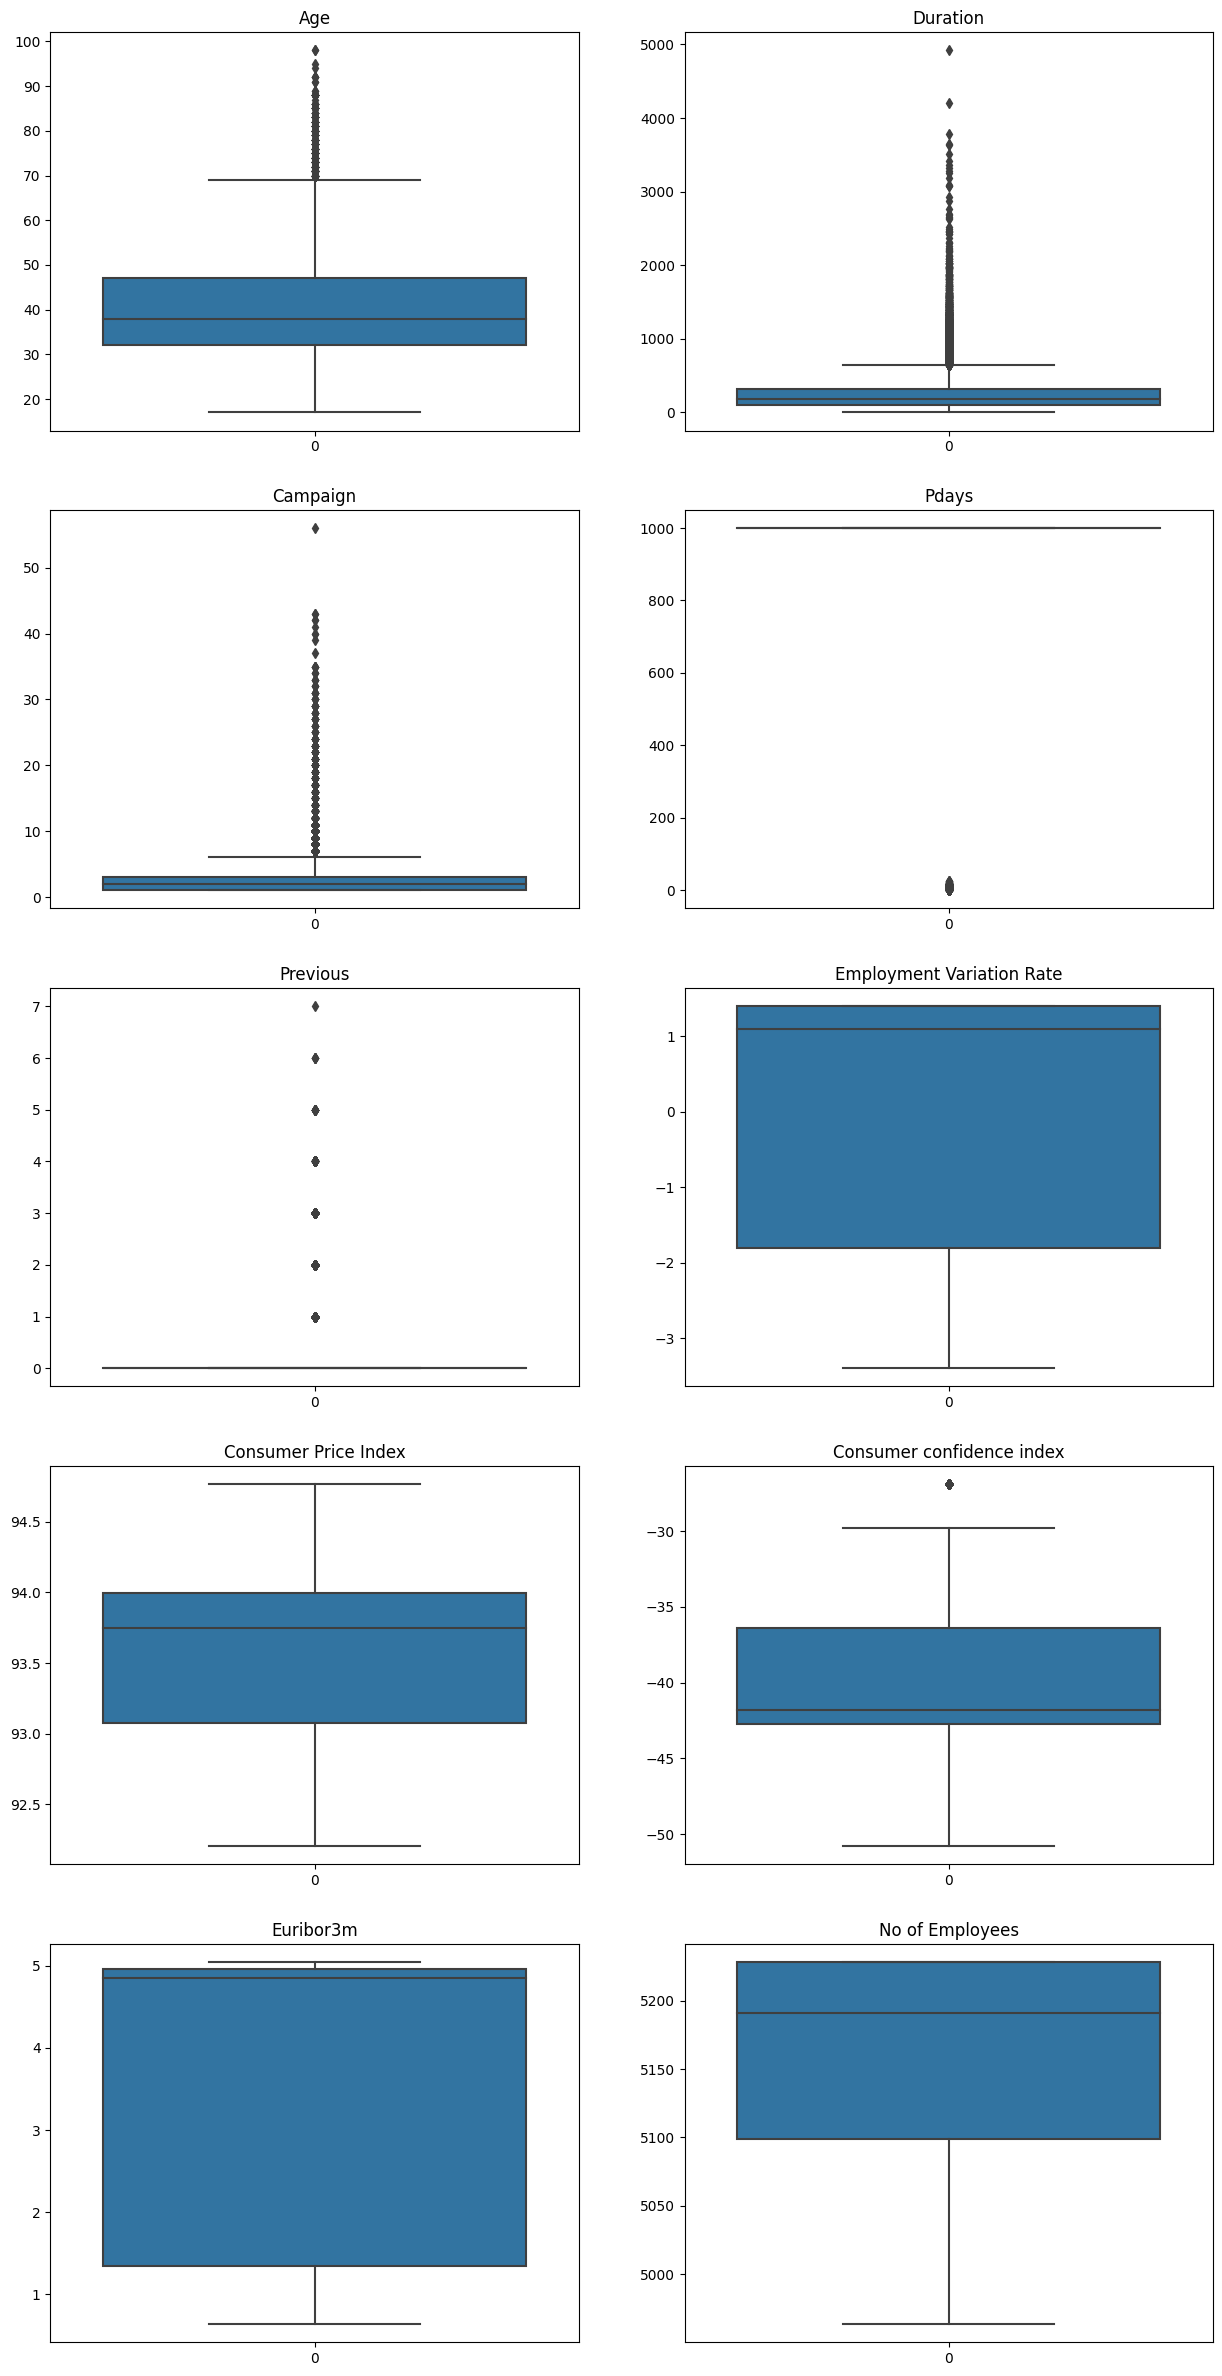

In [93]:
plt.figure(figsize = (15, 30))

Plot1=plt.subplot(5,2,1)
sns.boxplot(bank['age'])
Plot1.set_title('Age')

Plot2=plt.subplot(5,2,2)
sns.boxplot(bank['duration'])
Plot2.set_title('Duration')

Plot3=plt.subplot(5,2,3)
sns.boxplot(bank['campaign'])
Plot3.set_title('Campaign')

Plot4=plt.subplot(5,2,4)
sns.boxplot(bank['pdays'])
Plot4.set_title('Pdays')

Plot5=plt.subplot(5,2,5)
sns.boxplot(bank['previous'])
Plot5.set_title('Previous')

Plot6=plt.subplot(5,2,6)
sns.boxplot(bank['emp.var.rate'])
Plot6.set_title('Employment Variation Rate')

Plot7=plt.subplot(5,2,7)
sns.boxplot(bank['cons.price.idx'])
Plot7.set_title('Consumer Price Index')

Plot8=plt.subplot(5,2,8)
sns.boxplot(bank['cons.conf.idx'])
Plot8.set_title('Consumer confidence index')

Plot9=plt.subplot(5,2,9)
sns.boxplot(bank['euribor3m'])
Plot9.set_title('Euribor3m')

Plot10=plt.subplot(5,2,10)
sns.boxplot(bank['nr.employed'])
Plot10.set_title('No of Employees')

plt.show()

In [7]:
numerical_features=['age','campaign','duration','pdays','previous','cons.conf.idx']
for cols in numerical_features:
    Q1 = bank[cols].quantile(0.25)
    Q3 = bank[cols].quantile(0.75)
    IQR = Q3 - Q1

    filter = (bank[cols] >= Q1 - 1.5 * IQR) & (bank[cols] <= Q3 + 1.5 *IQR)
    bank=bank.loc[filter]

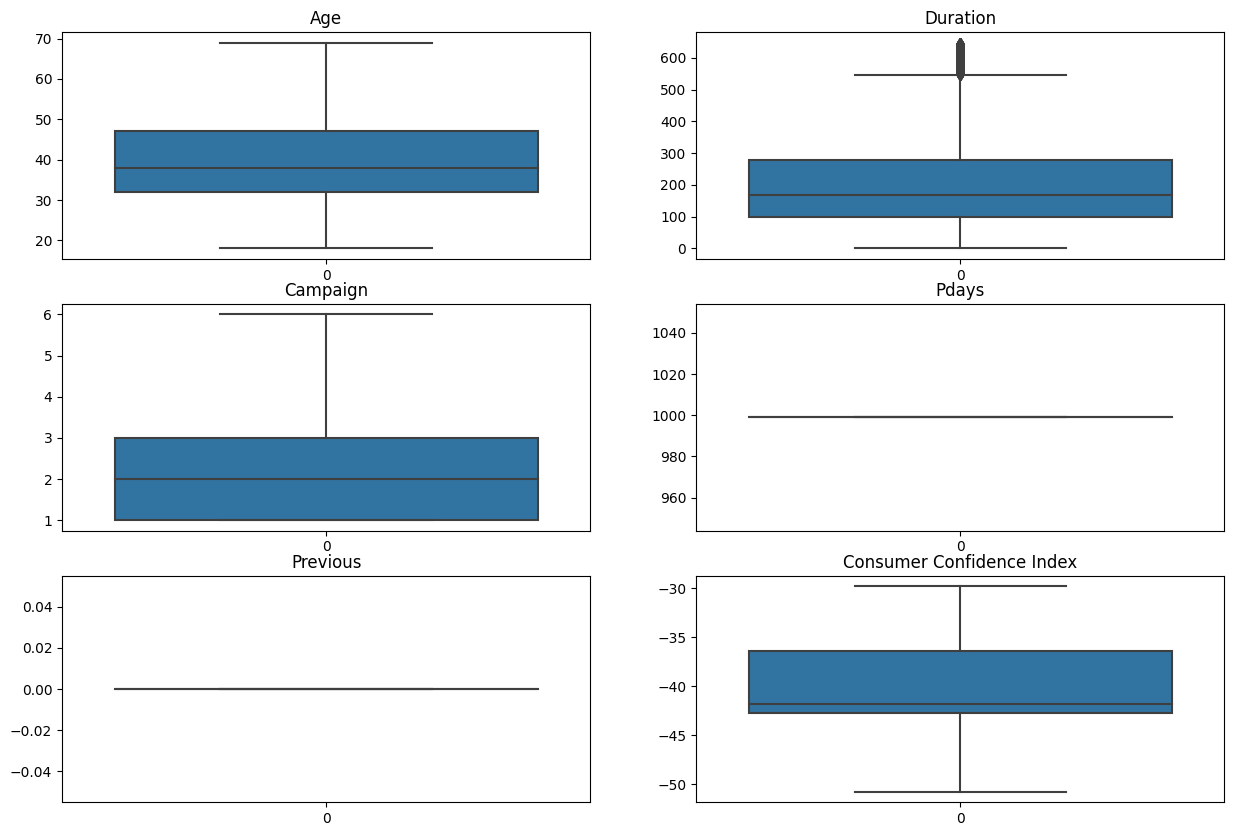

In [95]:
plt.figure(figsize = (15, 10))

Plot1=plt.subplot(3,2,1)
sns.boxplot(bank['age'])
Plot1.set_title('Age')

Plot2=plt.subplot(3,2,2)
sns.boxplot(bank['duration'])
Plot2.set_title('Duration')

Plot3=plt.subplot(3,2,3)
sns.boxplot(bank['campaign'])
Plot3.set_title('Campaign')

Plot4=plt.subplot(3,2,4)
sns.boxplot(bank['pdays'])
Plot4.set_title('Pdays')

Plot5=plt.subplot(3,2,5)
sns.boxplot(bank['previous'])
Plot5.set_title('Previous')

Plot6=plt.subplot(3,2,6)
sns.boxplot(bank['cons.conf.idx'])
Plot6.set_title('Consumer Confidence Index')

plt.show()

#  Handling Categorical Data

In [8]:
bank_data=bank.copy()

In [97]:
bank["default"].value_counts()

no         23494
unknown     6865
yes            2
Name: default, dtype: int64

In [98]:
bank["housing"].value_counts()

yes        15801
no         13825
unknown      735
Name: housing, dtype: int64

In [99]:
bank["loan"].value_counts()

no         25025
yes         4601
unknown      735
Name: loan, dtype: int64

In [100]:
dictionary= {'yes': 1, 'no': 0, 'unknown': -1}

bank_data["default"] = bank_data["default"].map(dictionary)
bank_data["housing"] = bank_data["housing"].map(dictionary)
bank_data["loan"] = bank_data["loan"].map(dictionary)

In [101]:
bank["y"].value_counts()

no     28698
yes     1663
Name: y, dtype: int64

In [102]:
dictionary= {'yes': 1, 'no': 0}

bank_data["y"] = bank_data["y"].map(dictionary)

In [103]:
bank["job"].value_counts()

admin.           7666
blue-collar      7147
technician       5082
services         2965
management       2145
entrepreneur     1096
self-employed    1061
retired           910
housemaid         807
unemployed        727
student           508
unknown           247
Name: job, dtype: int64

In [104]:
bank_data.replace({"admin.":1,"blue-collar":2,"technician":3,"services":4,"management":5,"entrepreneur":6,"self-employed":7,"retired":8,"housemaid":9,"unemployed":10,"student":11, "unknown":12 }, inplace=True)

In [105]:
bank["marital"].value_counts()

married     18645
single       8308
divorced     3362
unknown        46
Name: marital, dtype: int64

In [106]:
bank_data.replace({"married" : 1,"single":0, "divorced" :3, "unknown" :4}, inplace=True)

In [107]:
bank["education"].value_counts()

university.degree      8879
high.school            6939
basic.9y               4607
professional.course    3908
basic.4y               3051
basic.6y               1734
unknown                1230
illiterate               13
Name: education, dtype: int64

In [108]:
bank_data.replace({"basic.4y":"middle.school","basic.6y":"middle.school","basic.9y":"middle.school"}, inplace=True)

In [109]:
bank_data.replace({"middle.school": 0,"university.degree":1,"high.school": 2,"professional.course":3, "illiterate" : 4}, inplace=True)

In [110]:
bank["contact"].value_counts()

cellular     17817
telephone    12544
Name: contact, dtype: int64

In [111]:
bank_data.replace({ "telephone" : 0, "cellular" : 1}, inplace = True)

In [112]:
bank["poutcome"].value_counts()

nonexistent    30361
Name: poutcome, dtype: int64

In [113]:
bank_data.replace({"nonexistent" : 0}, inplace = True)

In [114]:
bank["day_of_week"].value_counts()

mon    6427
thu    6221
tue    6042
wed    6010
fri    5661
Name: day_of_week, dtype: int64

In [115]:
bank_data.replace({"mon":0,"thu":3,"tue":1,"wed":2,"fri":4}, inplace=True)

In [116]:
bank["month"].value_counts()

may    10372
jul     5693
aug     4914
jun     4231
nov     2786
apr     1640
mar      305
sep      227
oct      120
dec       73
Name: month, dtype: int64

In [117]:
bank_data.replace({"may" :5, "jul":7, "aug":8, "jun": 6, "nov":11,"apr":4,"mar":3,"sep":9,"oct":10,"dec":12}, inplace=True)

In [118]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30361 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30361 non-null  int64  
 1   job             30361 non-null  object 
 2   marital         30361 non-null  object 
 3   education       30361 non-null  object 
 4   default         30361 non-null  object 
 5   housing         30361 non-null  object 
 6   loan            30361 non-null  object 
 7   contact         30361 non-null  object 
 8   month           30361 non-null  object 
 9   day_of_week     30361 non-null  object 
 10  duration        30361 non-null  int64  
 11  campaign        30361 non-null  int64  
 12  pdays           30361 non-null  int64  
 13  previous        30361 non-null  int64  
 14  poutcome        30361 non-null  object 
 15  emp.var.rate    30361 non-null  float64
 16  cons.price.idx  30361 non-null  float64
 17  cons.conf.idx   30361 non-null 

In [119]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30361 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30361 non-null  int64  
 1   job             30361 non-null  int64  
 2   marital         30361 non-null  int64  
 3   education       30361 non-null  int64  
 4   default         30361 non-null  int64  
 5   housing         30361 non-null  int64  
 6   loan            30361 non-null  int64  
 7   contact         30361 non-null  int64  
 8   month           30361 non-null  int64  
 9   day_of_week     30361 non-null  int64  
 10  duration        30361 non-null  int64  
 11  campaign        30361 non-null  int64  
 12  pdays           30361 non-null  int64  
 13  previous        30361 non-null  int64  
 14  poutcome        30361 non-null  int64  
 15  emp.var.rate    30361 non-null  float64
 16  cons.price.idx  30361 non-null  float64
 17  cons.conf.idx   30361 non-null 

In [120]:
bank_data.head()

age  job  marital  education  default  housing  loan  contact  month  \
0   56    9        1          0        0        0     0        0      5   
1   57    4        1          2       -1        0     0        0      5   
2   37    4        1          2        0        1     0        0      5   
3   40    1        1          0        0        0     0        0      5   
4   56    4        1          2        0        0     1        0      5   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         1    999         0         0           1.1   
1            0  ...         1    999         0         0           1.1   
2            0  ...         1    999         0         0           1.1   
3            0  ...         1    999         0         0           1.1   
4            0  ...         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0  

[5 rows x 21 columns]

#  Standardization Scaling

In [121]:
import sklearn

from sklearn.preprocessing import StandardScaler

In [122]:
bank_scale=bank_data.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'contact','poutcome', 'marital']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

StandardScaler()

In [123]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'poutcome','contact',
       'marital']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

job  education  default  housing  loan  month  day_of_week  y  poutcome  \
0    9          0        0        0     0      5            0  0         0   
1    4          2       -1        0     0      5            0  0         0   
2    4          2        0        1     0      5            0  0         0   
3    1          0        0        0     0      5            0  0         0   
4    4          2        0        0     1      5            0  0         0   

   contact  ...       age  duration  campaign  pdays  previous  emp.var.rate  \
0        0  ...  1.722366  0.395851 -0.830399    0.0       0.0      0.501903   
1        0  ...  1.827842 -0.400157 -0.830399    0.0       0.0      0.501903   
2        0  ... -0.281661  0.147098 -0.830399    0.0       0.0      0.501903   
3        0  ...  0.034765 -0.385943 -0.830399    0.0       0.0      0.501903   
4        0  ...  1.722366  0.722783 -0.830399    0.0       0.0      0.501903   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.645118       0.963029   0.569846     0.149646  
1        0.645118       0.963029   0.569846     0.149646  
2        0.645118       0.963029   0.569846     0.149646  
3        0.645118       0.963029   0.569846     0.149646  
4        0.645118       0.963029   0.569846     0.149646  

[5 rows x 21 columns]

# Feature Selection

In [124]:
from sklearn.ensemble import ExtraTreesClassifier

In [125]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

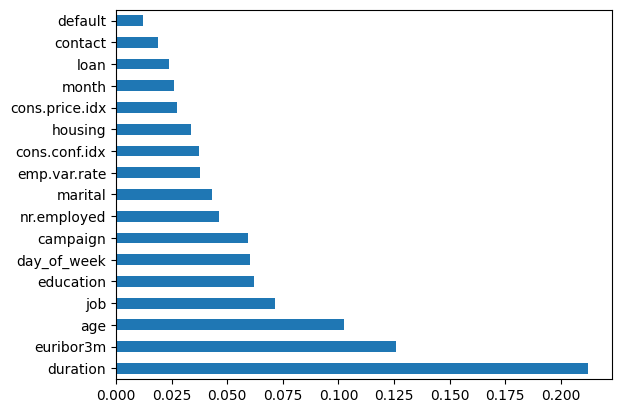

In [126]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

# Train & Test Split (80:20)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X=scaled_data.drop(['pdays','month','cons.conf.idx','loan','housing','y'],axis=1)
y=scaled_data.y

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)

In [130]:
print(X_train.shape)
print(X_test.shape)

(24288, 15)
(6073, 15)


#  Machine Learning Model

In [132]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [163]:
lr = LogisticRegression()
rf = RandomForestClassifier()
svc = SVC()
dt = DecisionTreeClassifier()

In [164]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9474724189033427

In [165]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9481310719578462

In [166]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9464844393215873

In [167]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9329820517042647

# Random Forest Classifier Model

In [169]:
rf = RandomForestClassifier()

In [170]:
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.948460398485098

In [142]:
AUC_RF= roc_auc_score(y_pred,y_test)
print("ROC_AUC Score:",AUC_RF)

ROC_AUC Score: 0.7557198332843714


In [146]:
cn = confusion_matrix (y_test,y_pred)
print(cn)

[[5653   83]
 [ 235  102]]


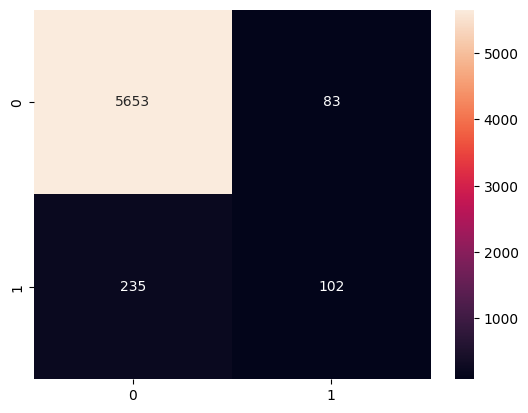

In [147]:
sns.heatmap(cn, annot=True, fmt='d');

In [148]:
print(classification_report (y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      5888
           1       0.30      0.55      0.39       185

    accuracy                           0.95      6073
   macro avg       0.64      0.76      0.68      6073
weighted avg       0.96      0.95      0.95      6073

